# Time series for each complaint type / all of them (And days of a week)


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar

In [2]:

dataframe = pd.read_csv('F:/Python_Project/1000linesfile.csv')
#df.to_csv(filename ,  index = False)
dataframe2 = dataframe.drop(['School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Location','Latitude','Longitude'],axis=1)
dataframe2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360.0,27-16 203 STREET,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019.0,200 CENTRAL PARK SOUTH,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,1993 GRAND AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372.0,84-16 NORTHERN BOULEVARD,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216.0,1057 BERGEN STREET,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified


In [3]:
dataframe2['Created Date'] = pd.to_datetime(dataframe2['Created Date'])
dataframe2['Closed Date'] = pd.to_datetime(dataframe2['Closed Date'])

dataframe2['Time Taken'] = dataframe2['Closed Date'] - dataframe2['Created Date']

# complaint created on what month of the year
dataframe2['Month'] = dataframe2['Created Date'].dt.month

dataframe2['Month'] = dataframe2['Month'].apply(lambda x: calendar.month_abbr[x])
#get only date
dataframe2['date'] = dataframe2['Created Date'].dt.date
#get only time
dataframe2['hours'] = dataframe2['Created Date'].dt.time

#get only hour and minute
dataframe2['only_hour'] = dataframe2['Created Date'].dt.hour
dataframe2['only_min'] = dataframe2['Created Date'].dt.minute

dataframe2['approx_min'] = np.where(dataframe2['only_min']>=30, 1, 0) # 1 if its above 30 else 0
dataframe2['hr'] = dataframe2['only_hour'] + dataframe2['approx_min']


# complaint created on what day of the week
dataframe2['weekday'] = dataframe2['Created Date'].dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataframe2['day_of_week'] = dataframe2['weekday'].apply(lambda x: days[x])

#get period of the day
times = list(range(8, 21, 4))
labels = ['morning', 'afternoon', 'evening', 'night']
periods = dict(zip(times, labels))
periods
#{8: 'morning', 16: 'evening', 12: 'afternoon', 20: 'night'}

def period(row):
    created_time = {'hour': row.Cd.hour, 'min': row.Cd.minute} # get hour, min of visit start
    for period_start, label in periods.items():
        period_end = period_start + 4
        if period_start <= created_time['hour'] < period_end:
            return label
        else:
            if 8>created_time['hour'] >= 0:
                return "early morning"
          

dataframe2['Cd'] = pd.to_datetime(dataframe['Created Date'])

dataframe2['period'] = dataframe2.apply(period, axis=1)



# All complaints w.r.t days, months, periods

In [32]:
dataframe3 = dataframe2[['Agency', 'day_of_week', 'Created Date', 'Complaint Type', 'Time Taken', 'Borough', 'Month', 'period' ]]
# days
dfday = dataframe3.groupby(['day_of_week','Borough'])['day_of_week'].count().reset_index(name="count").sort_values(by='Borough', ascending=1)
# months
dfmonth = dataframe3.groupby(['Month','Borough'])['Month'].count().reset_index(name="count").sort_values(by='Borough', ascending=1)
#periods
dfperiod = dataframe3.groupby(['period','Borough'])['period'].count().reset_index(name="count").sort_values(by='Borough', ascending=1)
dfperiod

filename = "F:/Python_Project/Analysis3/CSV/"
dfday.to_csv(filename+"complaints_days.csv",  index = False)
dfmonth.to_csv(filename+"complaints_month.csv",  index = False)
dfperiod.to_csv(filename+"complaints_period.csv",  index = False)

dfperiod.head()





,period,Borough,count
0,afternoon,BRONX,39
24,night,BRONX,42
6,early morning,BRONX,35
18,morning,BRONX,29
12,evening,BRONX,15


In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(25,8))
# sns.set_style("whitegrid")
# sns.set_context("notebook", font_scale=2)
# sns.barplot(x="Month", y="count", hue="Borough", data=dfmonth.sort_values(['Month', 'count']))
# plt.xlabel("Month of the year")
# plt.ylabel("Count of complaints")
# plt.suptitle("Complaints in each borough per month", y=1.05, fontsize=32)
# plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
# plt.xticks(rotation=50)
# plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_month.png", bbox_inches='tight')


# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(25,8))
# sns.set_style("whitegrid")
# sns.set_context("notebook", font_scale=2)
# sns.barplot(x="day_of_week", y="count", hue="Borough", data=dfday.sort_values(['day_of_week', 'count']))
# plt.xlabel("Day of week")
# plt.ylabel("Count of complaints")
# plt.suptitle("Complaints in each borough per day of the week", y=1.05, fontsize=32)
# plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
# plt.xticks(rotation=50)
# plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_day_of_week.png", bbox_inches='tight')


# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(25,8))
# sns.set_style("whitegrid")
# sns.set_context("notebook", font_scale=2)
# sns.barplot(x="period", y="count", hue="Borough", data=dfperiod.sort_values(['period', 'count']))

# plt.xlabel("Period of the day")
# plt.ylabel("Count of complaints")
# plt.suptitle("Complaints in each borough depending on the period of the day", y=1.05, fontsize=32)
# plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
# plt.xticks(rotation=50)
# plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_period.png", bbox_inches='tight')

# import seaborn as sns
# sns.set()

# sns.pairplot(dfperiod, hue="Borough")


In [28]:
dfp

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
period,,,,,,
afternoon,39,72,55,82,15,11
early morning,74,119,93,116,21,12
evening,89,166,134,165,27,13
morning,118,238,165,222,37,26
night,160,297,212,254,44,32


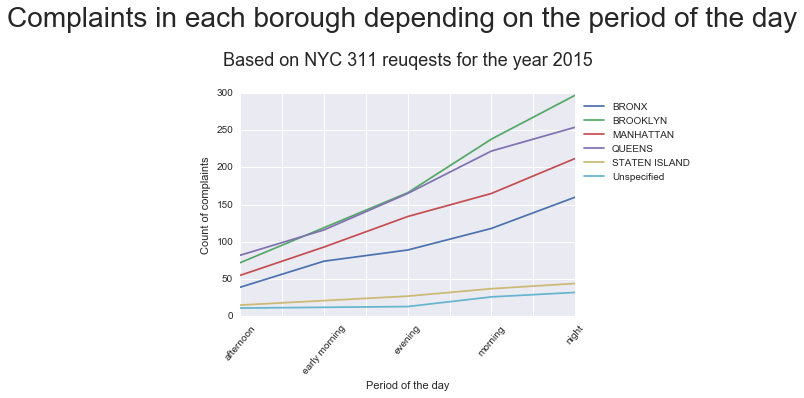

In [24]:
dfp = dfperiod.pivot(index='period', columns='Borough', values='count')

dfp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#dfperiod.plot.hist(alpha=0.5)
dfp = dfp.cumsum()
plt.figure(figsize=(15,15))
dfp.plot()
plt.xlabel("Period of the day")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough depending on the period of the day", y=1.2, fontsize=28)
plt.title("Based on NYC 311 reuqests for the year 2015",y=1.1, fontsize=18)
plt.xticks(rotation=50)
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_period.png", bbox_inches='tight')

In [26]:
dfd = dfday.pivot(index='day_of_week', columns='Borough', values='count')
dfd




Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
day_of_week,,,,,,
Friday,34,54,39,39,11,5
Monday,29,47,20,33,10,4
Saturday,10,50,30,19,8,2
Sunday,33,40,39,30,2,3
Thursday,23,44,30,34,6,8
Tuesday,17,26,36,55,3,4
Wednesday,14,36,18,44,4,6


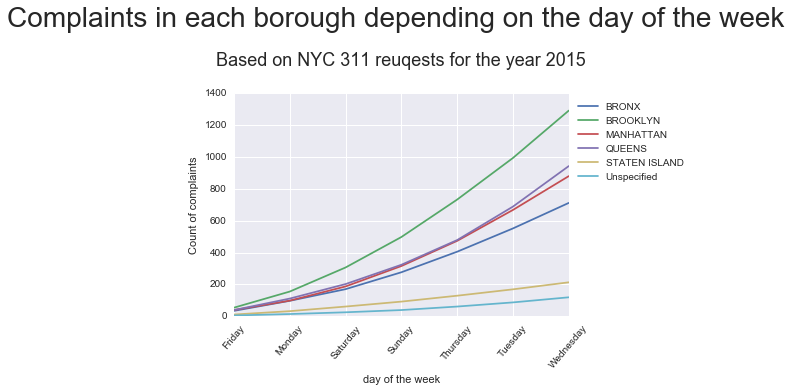

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

dfd = dfd.cumsum()
plt.figure(); 
dfd.plot();
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel("day of the week")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough depending on the day of the week", y=1.2, fontsize=28)
plt.title("Based on NYC 311 reuqests for the year 2015",y=1.1, fontsize=18)
plt.xticks(rotation=50)
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_day.png", bbox_inches='tight')



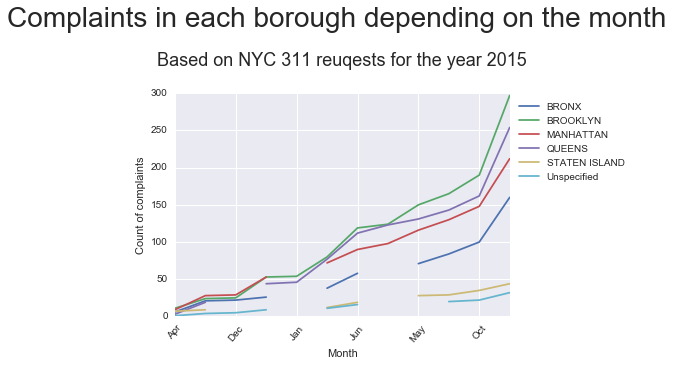

In [25]:
dfm = dfmonth.pivot(index='Month', columns='Borough', values='count')


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

dfm = dfm.cumsum()
plt.figure(); 
dfm.plot();
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Month")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough depending on the month", y=1.2, fontsize=28)
plt.title("Based on NYC 311 reuqests for the year 2015",y=1.1, fontsize=18)
plt.xticks(rotation=50)
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.savefig("F:/Python_Project/Analysis3/Images/"+"complaints_month.png", bbox_inches='tight')





# Check trend in each borough w.r.t day

Please enter: brooklyn
brooklyn


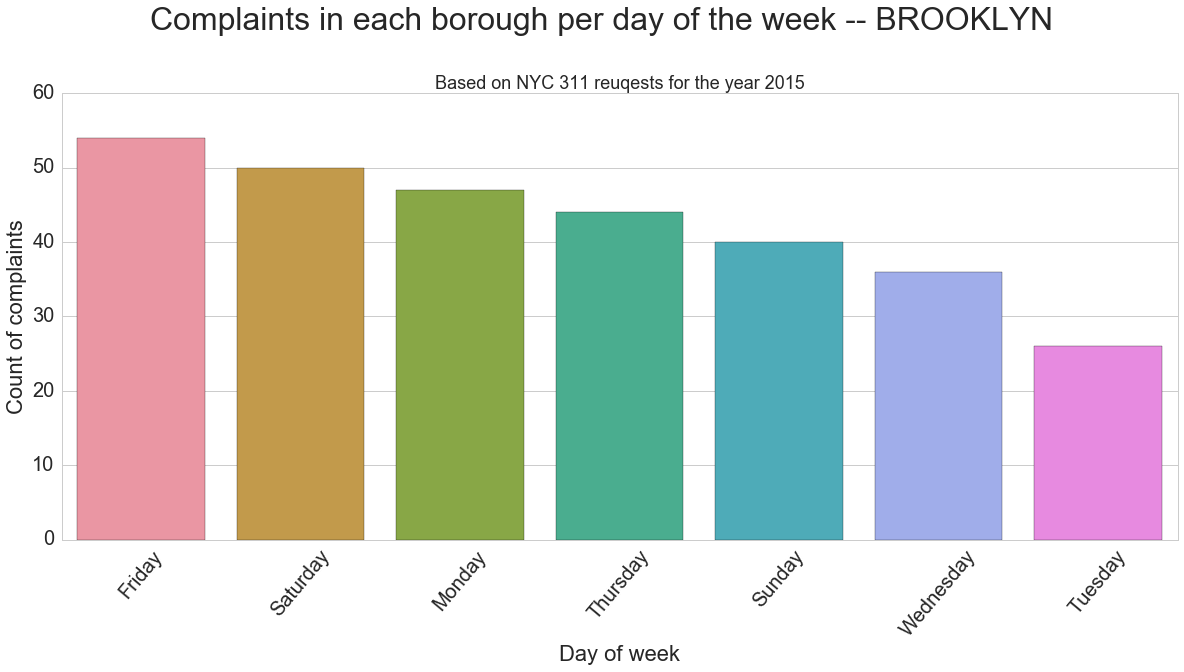

In [50]:
# get the number of complaints with respect to day of the week and borough

#dataframe3 = dataframe2[dataframe2['Agency'].notnull()]

dataframe3 = dataframe2[['Agency', 'day_of_week','weekday', 'Created Date', 'Complaint Type', 'Time Taken', 'Borough','Month','period','hr' ]]
borough = input('Please enter: ')
print(borough)


# get the number of complaints with repect to day of the week
if borough=="":
    print("Please enter borough")

else:
    # get the number of complaints with repect to day of the week and borough
    borough = borough.upper()
    dataframe3 = dataframe3[dataframe3['Borough'] == borough]
    dataframe4=dataframe3.groupby(['weekday','day_of_week'])["weekday"].count().reset_index(name="count").sort_values(by='count', ascending=0)
    filename = "F:/Python_Project/Analysis3/CSV/"
   
    dataframe4.to_csv(filename+"complaints_borough_days.csv",  index = False)
    
dataframe4
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="day_of_week", y="count", data=dataframe4)
plt.xlabel("Day of week")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough per day of the week -- "+borough, y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
plt.xticks(rotation=50)
plt.savefig("F:/Python_Project/Analysis3/Images/"+borough+"complaints_day_of_week.png", bbox_inches='tight')



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(dataframe4['weekday'],dataframe4['count']) #You can also add more variables here to represent color and size.
plt.show()


dataframe4['count'].plot(kind='pie', autopct='%.2f', labels=['','','',''],  ax=ax, fontsize=10)
ax.legend(loc=3, labels=dataframe4.index)

In [ ]:
def plot_borough_day_month_period(df, xaxis, yaxis):
    
    %matplotlib inline

    import matplotlib.pyplot as plt
    import seaborn as sns
       #dftrafficday = df
    plt.figure(figsize=(25,30))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2)
    sns.barplot(x=xaxis, y=axis, data=df)
    plt.xlabel("day_of_week")
    plt.ylabel("Number of complaints")
    plt.title("Number of complaints with respect to noise in every borough")
    plt.savefig("F:/Python_Project/Analysis3/Images/borough_day.png", bbox_inches='tight')


# Check trend in each borough w.r.t month

Please enter: brooklyn
brooklyn


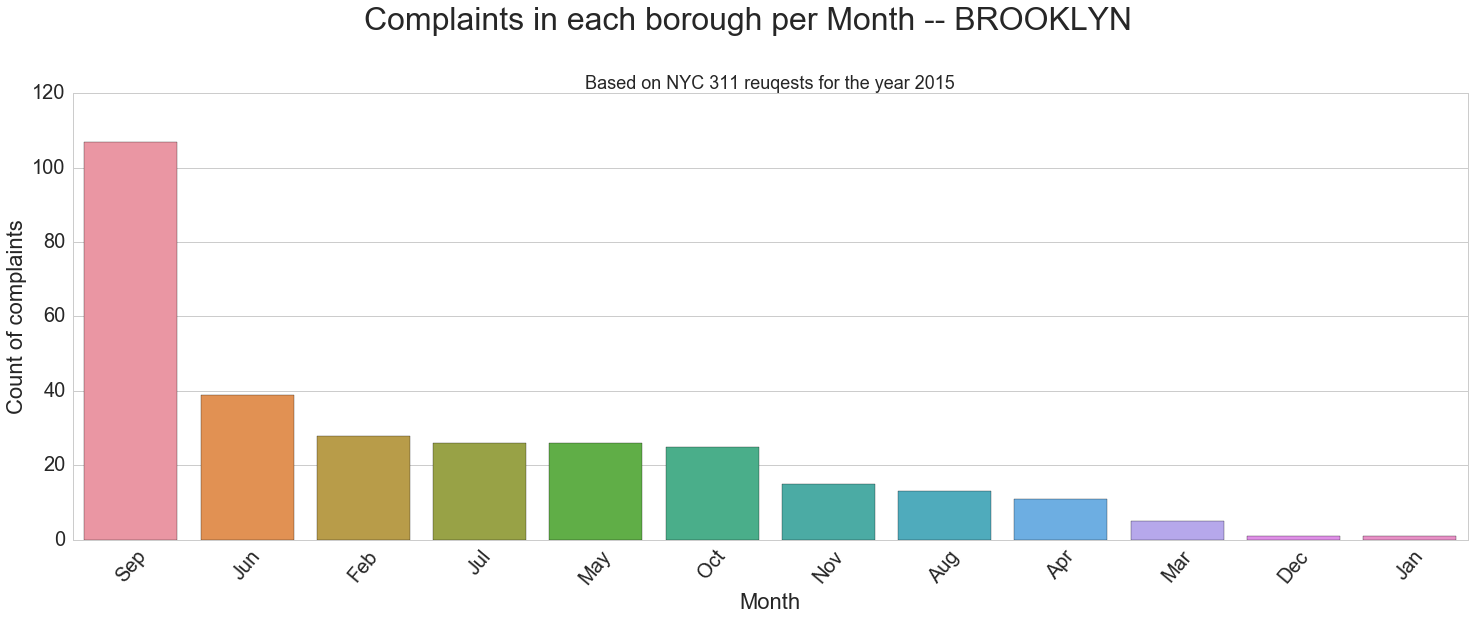

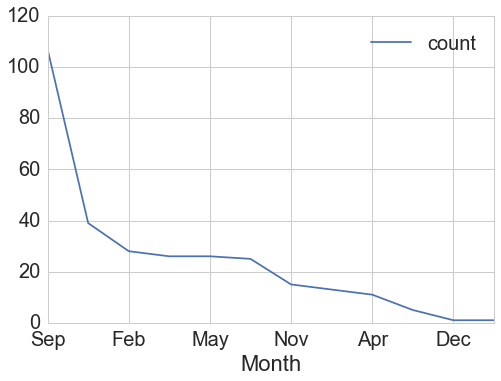

In [55]:
#dataframe5=dataframe3.groupby(['day_of_week', 'Borough'])["day_of_week"].count().reset_index(name="count").sort_values(by='count', ascending=0)

dataframe3 = dataframe2[['Agency', 'day_of_week', 'Created Date', 'Complaint Type', 'Time Taken', 'Borough','Month','period','hr' ]]
borough = input('Please enter: ')
print(borough)


# get the number of complaints with respect to month 
if borough=="":
    print("Please enter borough")
else:
    # get the number of complaints with repect to month and borough
    borough = borough.upper()
    dataframe3 = dataframe3[dataframe3['Borough'] == borough]
    dataframe6=dataframe3.groupby(['Month'])["Month"].count().reset_index(name="count").sort_values(by='count', ascending=0)
    filename = "F:/Python_Project/Analysis3/CSV/"

    dataframe6.to_csv(filename+"complaints_borough_month.csv",  index = False)
    name = borough+'_month'


dataframe6

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Month", y="count", data=dataframe6)
plt.xlabel("Month")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough per Month -- "+borough, y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
plt.xticks(rotation=50)
plt.savefig("F:/Python_Project/Analysis3/Images/"+borough+"complaints_month.png", bbox_inches='tight')

dataframe6.plot(x="Month", y="count")


# Check trend in each borough w.r.t period

Please enter: brooklyn
brooklyn


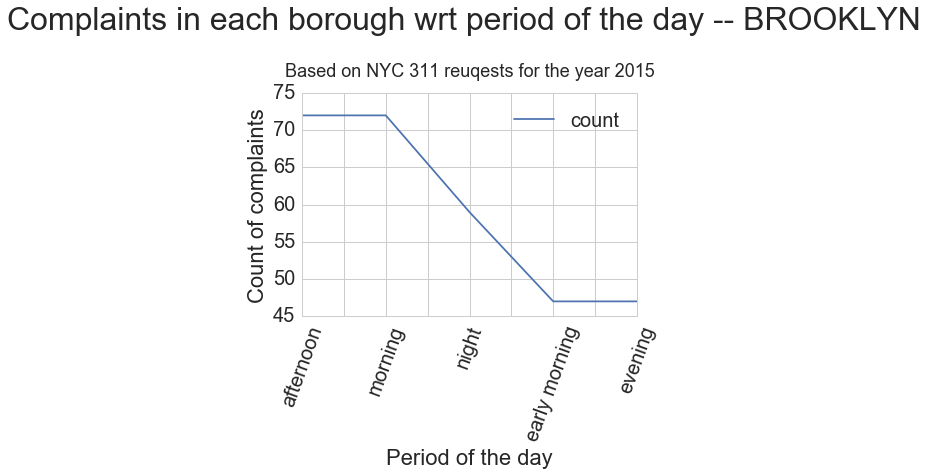

In [60]:
#dataframe5=dataframe3.groupby(['day_of_week', 'Borough'])["day_of_week"].count().reset_index(name="count").sort_values(by='count', ascending=0)

dataframe3 = dataframe2[['Agency', 'day_of_week', 'Created Date', 'Complaint Type', 'Time Taken', 'Borough','Month','period','hr' ]]
borough = input('Please enter: ')
print(borough)


# get the number of complaints with respect to month 
if borough=="":
    print(" Please enter borough ")
    
else:
    # get the number of complaints with repect to month and borough
    borough = borough.upper()
    dataframe3 = dataframe3[dataframe3['Borough'] == borough]
    dataframe6=dataframe3.groupby(['period'])["period"].count().reset_index(name="count").sort_values(by='count', ascending=0)
    filename = "F:/Python_Project/Analysis3/CSV/"

    dataframe4.to_csv(filename+"complaints_borough_period.csv",  index = False)
    name = borough+'_period'

    
dataframe6


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,8))
# sns.set_style("whitegrid")
# sns.set_context("notebook", font_scale=2)
# sns.barplot(x="period", y="count", data=dataframe6)
dataframe6.plot(x="period", y="count")
plt.xlabel("Period of the day")
plt.ylabel("Count of complaints")
plt.suptitle("Complaints in each borough wrt period of the day -- "+borough, y=1.2, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015",y=1.05, fontsize=18)
plt.xticks(rotation=70)
plt.savefig("F:/Python_Project/Analysis3/Images/"+borough+"complaints_period.png", bbox_inches='tight')



